По непонятной причине не работает Google Colab, пришлось разворачивать Spark на локальной машине, может поэтому код немного замороченный получился

Загружаю датасет через pandas, потом задаю его в spark. Код подсмотрела в интернете. Датасет не хотел читать столбцы, пришлось в названиях колонок поменять . на _

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd

sc = SparkContext('local','example')  
sql_sc = SQLContext(sc)

pandas_df = pd.read_csv('iris1.csv')  
df = sql_sc.createDataFrame(pandas_df)

In [2]:
df.count()

150

In [3]:
df.show(150)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|
+------------+-----------+------------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2|    Setosa|
|         4.9|        3.0|         1.4|        0.2|    Setosa|
|         4.7|        3.2|         1.3|        0.2|    Setosa|
|         4.6|        3.1|         1.5|        0.2|    Setosa|
|         5.0|        3.6|         1.4|        0.2|    Setosa|
|         5.4|        3.9|         1.7|        0.4|    Setosa|
|         4.6|        3.4|         1.4|        0.3|    Setosa|
|         5.0|        3.4|         1.5|        0.2|    Setosa|
|         4.4|        2.9|         1.4|        0.2|    Setosa|
|         4.9|        3.1|         1.5|        0.1|    Setosa|
|         5.4|        3.7|         1.5|        0.2|    Setosa|
|         4.8|        3.4|         1.6|        0.2|    Setosa|
|         4.8|        3.0|         1.4|        0.1|    

Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров

In [4]:
df_setosa = df.where((df['variety'] == 'Setosa'))
df_virginica = df.where((df['variety'] == 'Virginica'))
df_versicolor = df.where((df['variety'] == 'Versicolor'))

In [5]:
df_setosa.describe().show()

+-------+------------------+------------------+------------------+-------------------+-------+
|summary|      sepal_length|       sepal_width|      petal_length|        petal_width|variety|
+-------+------------------+------------------+------------------+-------------------+-------+
|  count|                50|                50|                50|                 50|     50|
|   mean| 5.005999999999999| 3.428000000000001|1.4620000000000002| 0.2459999999999999|   null|
| stddev|0.3524896872134513|0.3790643690962886|0.1736639964801841|0.10538558938004565|   null|
|    min|               4.3|               2.3|               1.0|                0.1| Setosa|
|    max|               5.8|               4.4|               1.9|                0.6| Setosa|
+-------+------------------+------------------+------------------+-------------------+-------+



In [6]:
df_virginica.describe().show()

+-------+-----------------+------------------+------------------+------------------+---------+
|summary|     sepal_length|       sepal_width|      petal_length|       petal_width|  variety|
+-------+-----------------+------------------+------------------+------------------+---------+
|  count|               50|                50|                50|                50|       50|
|   mean|6.587999999999998|2.9739999999999998|             5.552|             2.026|     null|
| stddev|0.635879593274432|0.3224966381726375|0.5518946956639833|0.2746500556366674|     null|
|    min|              4.9|               2.2|               4.5|               1.4|Virginica|
|    max|              7.9|               3.8|               6.9|               2.5|Virginica|
+-------+-----------------+------------------+------------------+------------------+---------+



In [7]:
df_versicolor.describe().show()

+-------+------------------+------------------+------------------+-------------------+----------+
|summary|      sepal_length|       sepal_width|      petal_length|        petal_width|   variety|
+-------+------------------+------------------+------------------+-------------------+----------+
|  count|                50|                50|                50|                 50|        50|
|   mean|             5.936|2.7700000000000005|              4.26| 1.3259999999999998|      null|
| stddev|0.5161711470638635|0.3137983233784114|0.4699109772399579|0.19775268000454407|      null|
|    min|               4.9|               2.0|               3.0|                1.0|Versicolor|
|    max|               7.0|               3.4|               5.1|                1.8|Versicolor|
+-------+------------------+------------------+------------------+-------------------+----------+



Визуализируйте точечный график (plt.scatter) по каждой паре параметров

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
pd_df = df.toPandas()

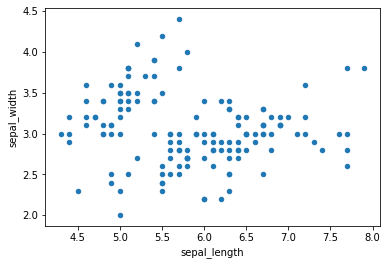

In [11]:
pd_df.plot.scatter (x = 'sepal_length', y = 'sepal_width')

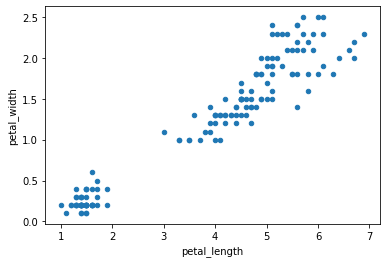

In [12]:
pd_df.plot.scatter (x = 'petal_length', y = 'petal_width')

Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)

Построим отдельные графики для каждого вида цветка

In [13]:
pd_df_setosa = df_setosa.toPandas()
pd_df_virginica = df_virginica.toPandas()
pd_df_versicolor = df_versicolor.toPandas()

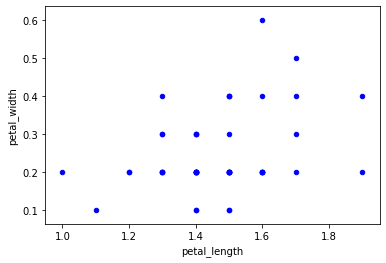

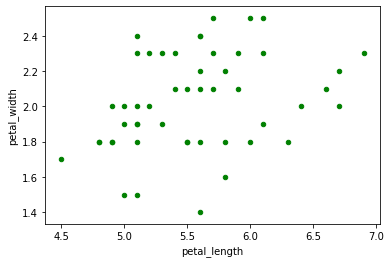

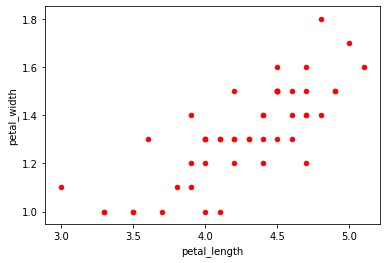

In [14]:
pd_df_setosa.plot.scatter (x = 'petal_length', y = 'petal_width', color='blue')
pd_df_virginica.plot.scatter (x = 'petal_length', y = 'petal_width', color='green')
pd_df_versicolor.plot.scatter (x = 'petal_length', y = 'petal_width', color = 'red')

То же самое по sepal_lenght, хотя по petal_lenght мне кажется понятнее

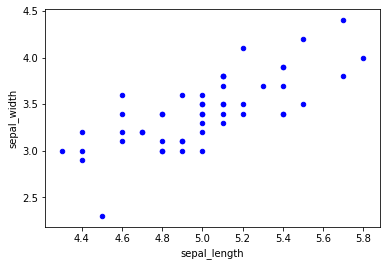

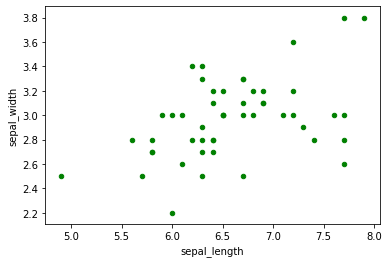

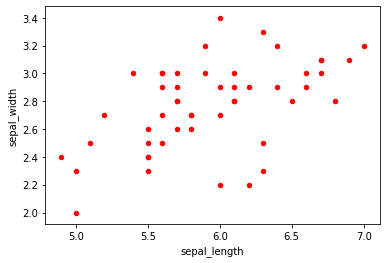

In [15]:
pd_df_setosa.plot.scatter (x = 'sepal_length', y = 'sepal_width', color='blue')
pd_df_virginica.plot.scatter (x = 'sepal_length', y = 'sepal_width', color='green')
pd_df_versicolor.plot.scatter (x = 'sepal_length', y = 'sepal_width', color = 'red')

Проще всего предсказать по setose, длина меньше 2.0, ширина меньше 0.7

In [16]:
df_setosa_pred = df.where((df['petal_length'] < 2.0) & (df['petal_width'] < 0.7))
df_setosa_pred.show(150)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

Создадим колонку predict, в которую закинем булево значение, если ['variety'] == 'Setosa', то выведется значение true

In [17]:
df_setosa_pred = df_setosa_pred.withColumn('predict', df_setosa['variety'] == 'Setosa')
df_setosa_pred.show(150)

+------------+-----------+------------+-----------+-------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|predict|
+------------+-----------+------------+-----------+-------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|   true|
|         4.9|        3.0|         1.4|        0.2| Setosa|   true|
|         4.7|        3.2|         1.3|        0.2| Setosa|   true|
|         4.6|        3.1|         1.5|        0.2| Setosa|   true|
|         5.0|        3.6|         1.4|        0.2| Setosa|   true|
|         5.4|        3.9|         1.7|        0.4| Setosa|   true|
|         4.6|        3.4|         1.4|        0.3| Setosa|   true|
|         5.0|        3.4|         1.5|        0.2| Setosa|   true|
|         4.4|        2.9|         1.4|        0.2| Setosa|   true|
|         4.9|        3.1|         1.5|        0.1| Setosa|   true|
|         5.4|        3.7|         1.5|        0.2| Setosa|   true|
|         4.8|        3.4|         1.6|        0

Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)
Посчитаем общее количество значений predict и количество значений false

In [18]:
df_setosa_pred.filter('predict').count()

50

In [19]:
df_setosa_pred.filter(df_setosa_pred['predict'] == 0).count() #не угадали 0 раз

0

Дальше было интересно попробовать для virginica и versicolor

In [20]:
df_virginica_pred = df.where((df['petal_length'] > 4.5) & (df['petal_width'] > 1.4))
df_virginica_pred.show(150)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|
+------------+-----------+------------+-----------+----------+
|         6.9|        3.1|         4.9|        1.5|Versicolor|
|         6.5|        2.8|         4.6|        1.5|Versicolor|
|         6.3|        3.3|         4.7|        1.6|Versicolor|
|         5.9|        3.2|         4.8|        1.8|Versicolor|
|         6.3|        2.5|         4.9|        1.5|Versicolor|
|         6.7|        3.0|         5.0|        1.7|Versicolor|
|         6.0|        2.7|         5.1|        1.6|Versicolor|
|         6.7|        3.1|         4.7|        1.5|Versicolor|
|         6.3|        3.3|         6.0|        2.5| Virginica|
|         5.8|        2.7|         5.1|        1.9| Virginica|
|         7.1|        3.0|         5.9|        2.1| Virginica|
|         6.3|        2.9|         5.6|        1.8| Virginica|
|         6.5|        3.0|         5.8|        2.2| Vir

In [21]:
df_virginica_pred = df_virginica_pred.withColumn('predict', df_versicolor['variety'] == 'Virginica')
df_virginica_pred.show()

+------------+-----------+------------+-----------+----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|predict|
+------------+-----------+------------+-----------+----------+-------+
|         6.9|        3.1|         4.9|        1.5|Versicolor|  false|
|         6.5|        2.8|         4.6|        1.5|Versicolor|  false|
|         6.3|        3.3|         4.7|        1.6|Versicolor|  false|
|         5.9|        3.2|         4.8|        1.8|Versicolor|  false|
|         6.3|        2.5|         4.9|        1.5|Versicolor|  false|
|         6.7|        3.0|         5.0|        1.7|Versicolor|  false|
|         6.0|        2.7|         5.1|        1.6|Versicolor|  false|
|         6.7|        3.1|         4.7|        1.5|Versicolor|  false|
|         6.3|        3.3|         6.0|        2.5| Virginica|   true|
|         5.8|        2.7|         5.1|        1.9| Virginica|   true|
|         7.1|        3.0|         5.9|        2.1| Virginica|   true|
|     

In [22]:
df_virginica_pred.filter("predict").count()

48

In [28]:
df_virginica_pred.filter(df_virginica_pred['predict'] == 0).count() # не угадали 8 раз

8

versicolor

In [24]:
df_versicolor_pred = df.where((df['petal_length'] <= 4.5) & (df['petal_length'] >= 2.0) & (df['petal_width'] <= 1.4)& (df['petal_width'] >= 0.7))
df_versicolor_pred.show(150)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|
+------------+-----------+------------+-----------+----------+
|         5.5|        2.3|         4.0|        1.3|Versicolor|
|         5.7|        2.8|         4.5|        1.3|Versicolor|
|         4.9|        2.4|         3.3|        1.0|Versicolor|
|         5.2|        2.7|         3.9|        1.4|Versicolor|
|         5.0|        2.0|         3.5|        1.0|Versicolor|
|         6.0|        2.2|         4.0|        1.0|Versicolor|
|         5.6|        2.9|         3.6|        1.3|Versicolor|
|         6.7|        3.1|         4.4|        1.4|Versicolor|
|         5.8|        2.7|         4.1|        1.0|Versicolor|
|         5.6|        2.5|         3.9|        1.1|Versicolor|
|         6.1|        2.8|         4.0|        1.3|Versicolor|
|         6.4|        2.9|         4.3|        1.3|Versicolor|
|         6.6|        3.0|         4.4|        1.4|Vers

In [25]:
df_versicolor_pred = df_versicolor_pred.withColumn('predict', df_versicolor['variety'] == 'Versicolor')
df_versicolor_pred.show()

+------------+-----------+------------+-----------+----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|predict|
+------------+-----------+------------+-----------+----------+-------+
|         5.5|        2.3|         4.0|        1.3|Versicolor|   true|
|         5.7|        2.8|         4.5|        1.3|Versicolor|   true|
|         4.9|        2.4|         3.3|        1.0|Versicolor|   true|
|         5.2|        2.7|         3.9|        1.4|Versicolor|   true|
|         5.0|        2.0|         3.5|        1.0|Versicolor|   true|
|         6.0|        2.2|         4.0|        1.0|Versicolor|   true|
|         5.6|        2.9|         3.6|        1.3|Versicolor|   true|
|         6.7|        3.1|         4.4|        1.4|Versicolor|   true|
|         5.8|        2.7|         4.1|        1.0|Versicolor|   true|
|         5.6|        2.5|         3.9|        1.1|Versicolor|   true|
|         6.1|        2.8|         4.0|        1.3|Versicolor|   true|
|     

In [26]:
df_versicolor_pred.filter("predict").count()

29

In [29]:
df_versicolor_pred.filter(df_versicolor_pred['predict'] == 0).count() # не угадали 0 раз

0